In [41]:
import random as r
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
from scipy.special import stdtr

a)

Definiowanie Planszy

In [42]:
size = 21
plansza = np.zeros(size*size)
plansza.resize(size,size)


In [43]:
centrum1 = [10,0]
centrum2 = [10,20]

Funkcja licząca odległość

In [44]:
def policz_odl(rzut : list) -> float:
    return min((((rzut[0]-centrum1[0])**2) + ((rzut[1]-centrum1[1])**2))**0.5,(((rzut[0]-centrum2[0])**2) + ((rzut[1]-centrum2[1])**2))**0.5)

Funkcja licząca punkty

In [45]:
def podaj_pkt(odl : float) -> int:
    pkt = 10 - math.ceil(odl - 1)
    if pkt > 0:
        return pkt
    else: 
        return 0

Wykonanie testów i wyświetlenie histogramów ( b), c), d) )

Skorzystamy z testu t-studenta w celu sprawdzenia hipotezy "Czy średni wynik wynik jest statystycznie istotnie większy od 5?"

H0: Średni wynik dyskobola wynosi 5 lub mniej
HA: Średni wynik dyskobola jest większy niż 5

In [46]:

def test_tstudenta(próba : list, expected_mean : float) -> str:
    
    mean = np.mean(próba)
    std = np.std(próba, ddof=1)
    n = len(próba)
    t_stat = (mean - expected_mean) / (std / np.sqrt(n))
    
    p = 1 - stdtr(n-1, t_stat)
    
    if p < 0.05:
        return "Odrzucamy hipotezę zerową. Średni wynik jest statystycznie istotnie większy od 5." 
    else:
        return "Brak podstaw do odrzucenia hipotezy zerowej. Średni wynik nie różni się istotnie od 5."
    

In [47]:
n = [10,100,1000]

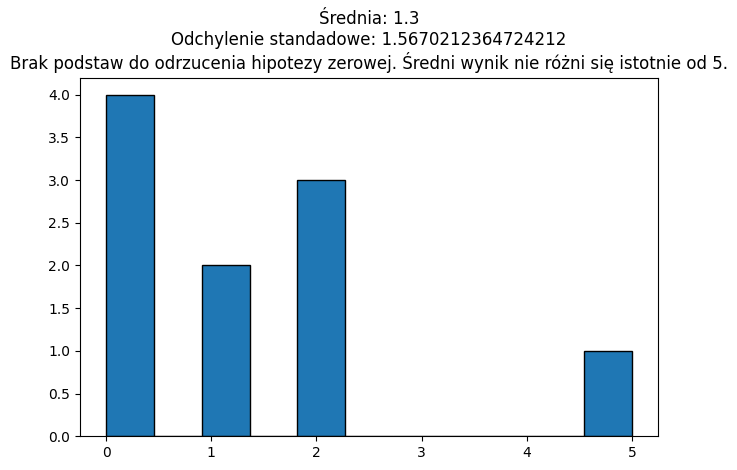

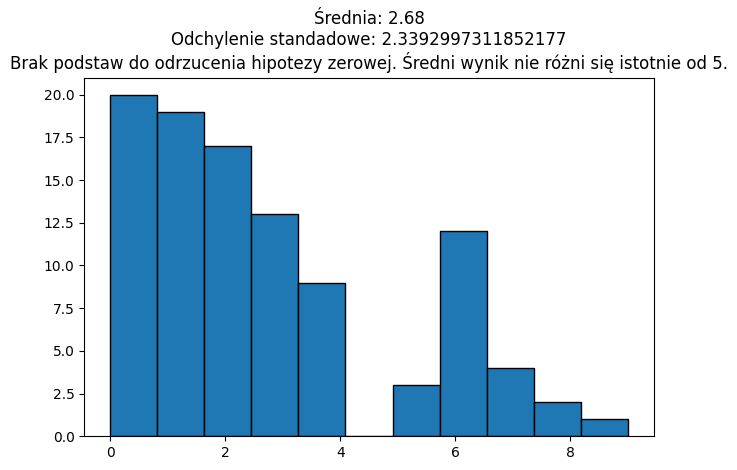

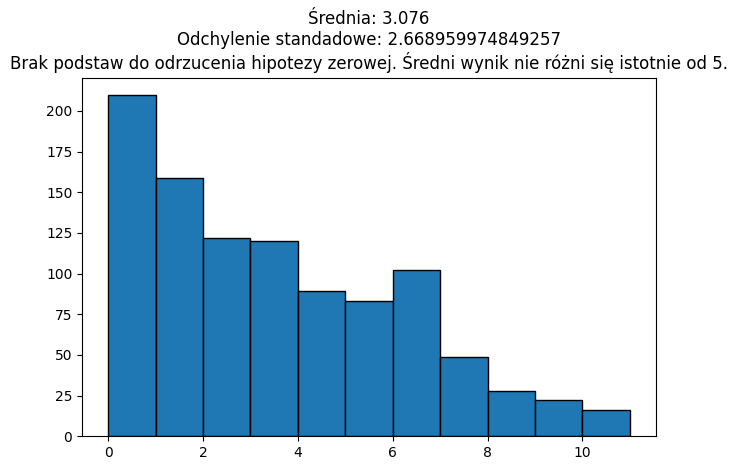

In [48]:
for k in n:
    sym = [[r.randrange(0,20),r.randrange(0,20)] for i in range(k)]
    wynik = [podaj_pkt(policz_odl(sym[i])) for i in range(k)]
    odp = test_tstudenta(wynik, 5)
    plt.hist(wynik,edgecolor='black',bins = 11)
    plt.title(f'Średnia: {np.mean(wynik)}\nOdchylenie standadowe: {statistics.stdev(wynik)}\n{odp}')
    plt.tight_layout()
    plt.show()

Widzimy, że wartość dla testu t-Studenta jest ujemna, co oznacza, że hipoteza, że gracz zdobywa średnio 5 lub więcej punktów nie ma żadnych dowodów na jej poparcie.

e)

Łatwo zauwayć, że występują duże różnice w ilości zdobywanych punktów przez gracza. Zdecydowanie cześciej otrzymuje on 0 pkt niz 10, co w przypadku rozkładu równomiernego nie powinno mieć miejsca